计算敏感度

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

adult = pd.read_csv("adult_with_pii.csv")

例子："数据集中有多少人？"（敏感度：1，计算总行数）

In [2]:
adult.shape[0]

32561

例子："受教育年数超过10年的有多少人"（敏感度：1，根据属性计算行数）

In [3]:
adult[adult['Education-Num'] > 10].shape[0]

10516

例子："受教育年数小于或等于10年的有多少人？"（敏感度：1，根据属性计算行数）

In [4]:
adult[adult['Education-Num'] <= 10].shape[0]

22045

例子："名字叫Joe Near的有多少人？"（敏感度：1，根据属性计算行数）

In [5]:
adult[adult['Name'] == 'Joe Near'].shape[0]

0

求和问询

例子："受教育年数超过10年的人，其年龄总和是多少？"

In [6]:
adult[adult['Education-Num'] > 10]['Age'].sum()

422876

均值问询

例子："受教育年数超过10年的人，其平均年龄是多少？"

In [7]:
adult[adult['Education-Num'] > 10]['Age'].mean()

40.21262837580829

应用差分隐私回复均值问询的最简单方法是，将均值问询拆分为两个问询：求和问询除以计数问询。对上述例子，我们有：

In [8]:
adult[adult['Education-Num'] > 10]['Age'].sum() / adult[adult['Education-Num'] > 10]['Age'].shape[0]

40.21262837580829

裁剪

In [9]:
adult['Age'].clip(lower=0, upper=125).sum()

1256257

一般来说，要将裁剪边界设置为（尽可能）100%的保留数据集的所有信息。但必须承认，某些领域（例如后续将学习的图问询）很难做到这一点。

很容易想到通过查看数据来确定裁剪边界。例如，我们可以查看数据集的年龄直方图，从而确定一个适当的敏感度上界：

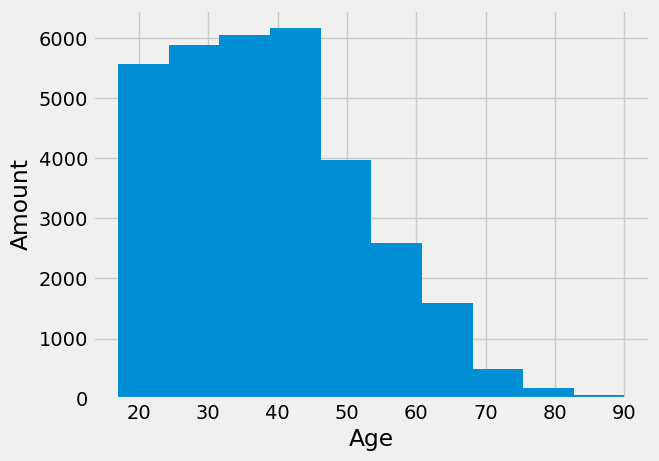

In [11]:
plt.hist(adult['Age'])
plt.xlabel('Age')
plt.ylabel('Amount');

当使用第二种方法确定裁剪边界时，我们一般先将敏感度下界设置为0，随后逐渐增加上界，直至问询输出不再变化（也就是说，即使进一步提高上界，问询的数据也不会再因裁剪而发生任何变化）。例如，让我们尝试计算裁剪边界从0到100的年龄总和，并对每次问询使用拉普拉斯机制，保证此过程满足差分隐私：

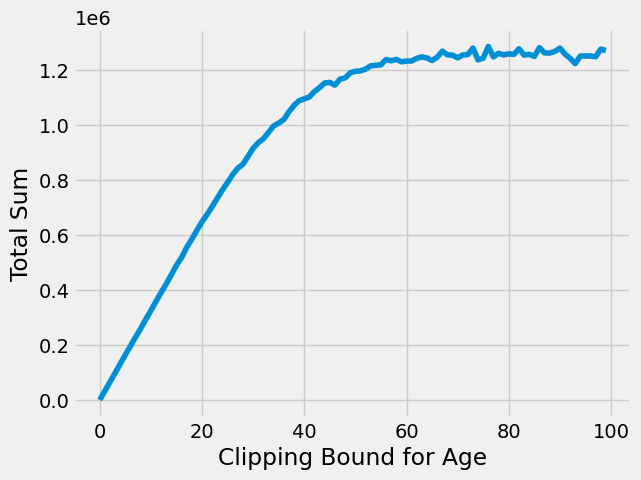

In [12]:
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)

epsilon_i = .01
plt.plot([laplace_mech(adult['Age'].clip(lower=0, upper=i).sum(), i, epsilon_i) for i in range(100)])
plt.xlabel('Clipping Bound for Age')
plt.ylabel('Total Sum');

当数据的取值范围未知时，一种很好的改进方法就是根据依对数取值范围估计上界。

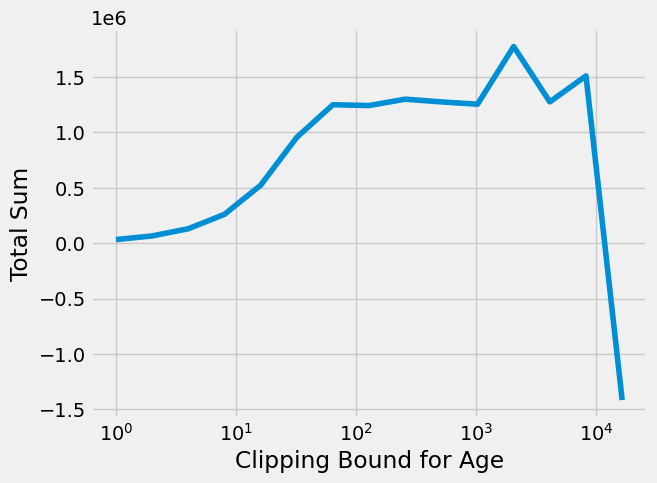

In [13]:
xs = [2**i for i in range(15)]
plt.plot(xs, [laplace_mech(adult['Age'].clip(lower=0, upper=i).sum(), i, epsilon_i) for i in xs])
plt.xscale('log')
plt.xlabel('Clipping Bound for Age')
plt.ylabel('Total Sum');